In [10]:
import os
import pickle

In [11]:
with open("data/X_train_tfidf.pkl", "rb") as f:
    X_train_tfidf = pickle.load(f)

with open("data/X_test_tfidf.pkl", "rb") as f:
    X_test_tfidf = pickle.load(f)

with open("data/y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

with open("data/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

print("X_train_tfidf shape:", X_train_tfidf.shape)
print("X_test_tfidf shape:", X_test_tfidf.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_tfidf shape: (2133, 33559)
X_test_tfidf shape: (534, 33559)
y_train shape: (2133,)
y_test shape: (534,)


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
def evaluate_model(y_true, y_pred, class_names_file='class_names.txt'):
    
    with open(class_names_file, 'r') as f:
        class_names = [line.strip() for line in f.readlines()]

    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred_rf = rf_classifier.predict(X_test_tfidf)

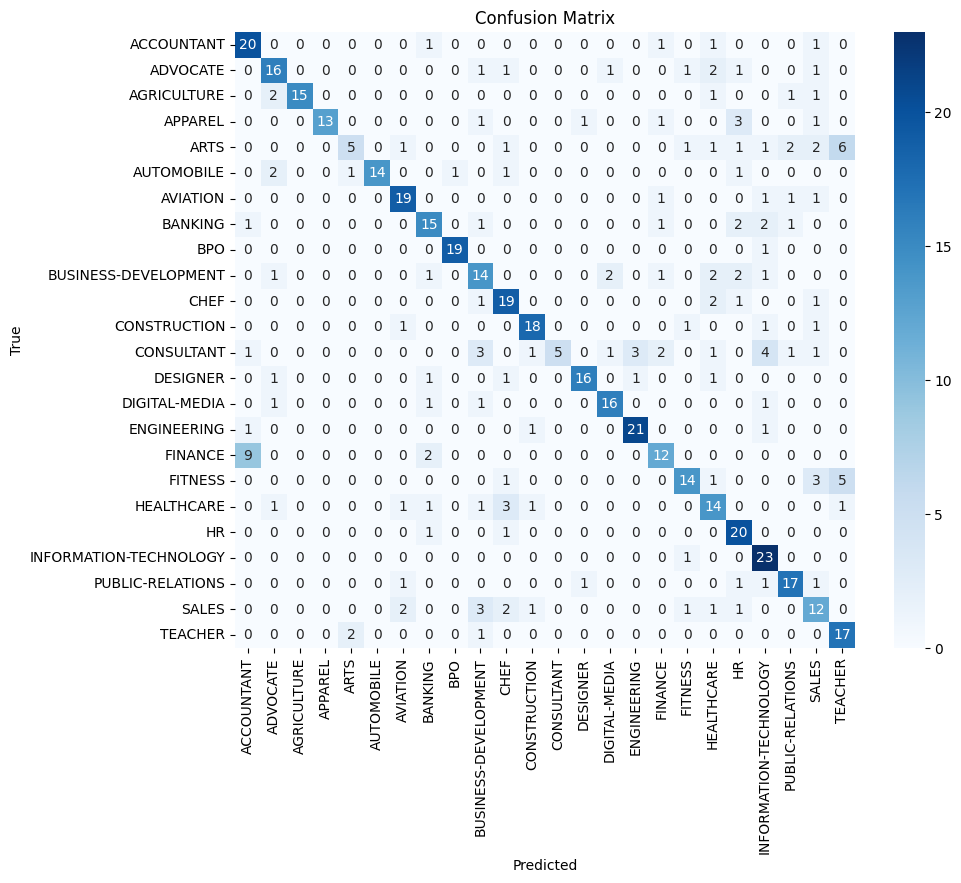

Random Forest Accuracy: 0.70


In [19]:
rf_acc = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.2f}")

In [20]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train_tfidf, y_train)

/home/omar/anaconda3/envs/resume-app/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [22]:
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)

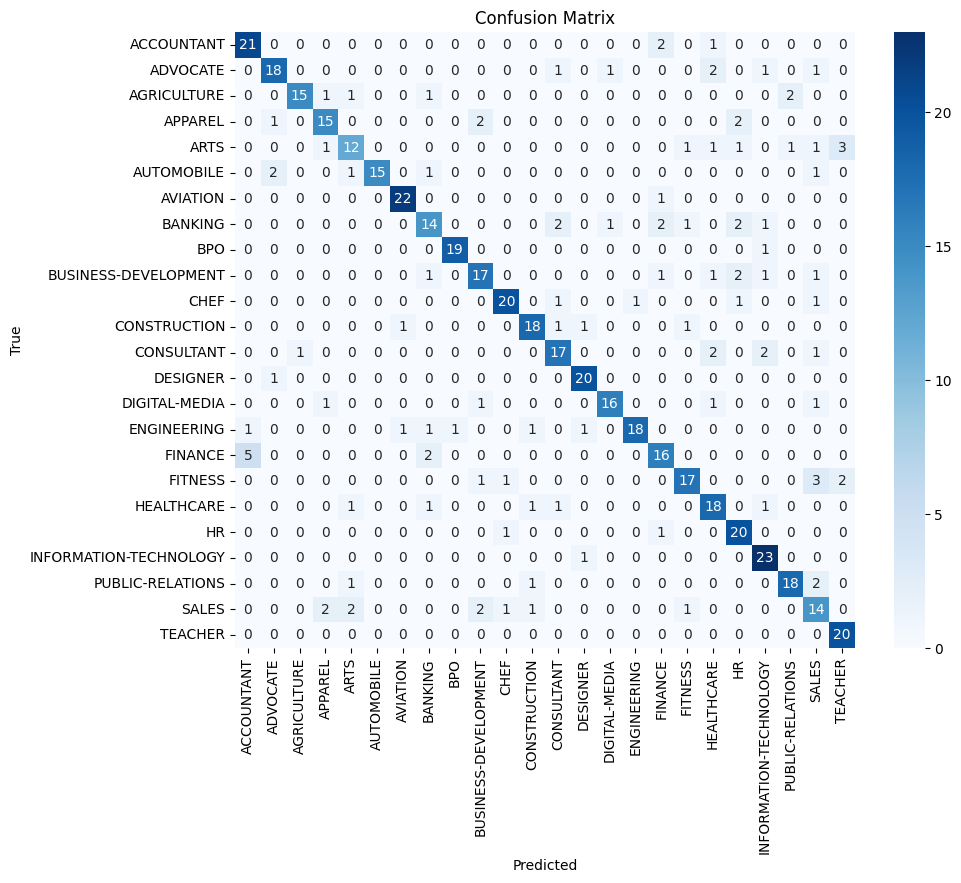

XGBClassifier Accuracy: 0.79


In [24]:
rf_acc = evaluate_model(y_test, y_pred_xgb)
print(f"XGBClassifier Accuracy: {rf_acc:.2f}")

In [25]:
import pickle
pickle.dump(xgb_classifier,open('models/rf_classifier_categorization.pkl','wb'))